In [ ]:
# Try changepoint detection algorithm instead of unit root test in step1

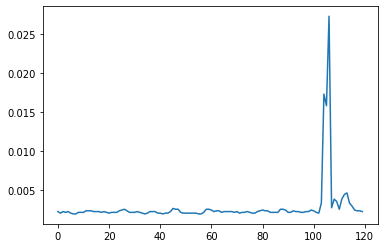

In [2]:
import sys

sys.path.append('../')
from tsdr import tsdr

import matplotlib.pyplot as plt
import numpy as np

filepath = '/datasets/argowf-chaos-hg68n/2021-12-09-argowf-chaos-hg68n-user_pod-memory-hog_0.json'
data_df, _, metrics_meta = tsdr.read_metrics_json(filepath)
misdetected_series = data_df['s-user_latency'].to_numpy()
plt.plot(misdetected_series)

(<Figure size 576x288 with 1 Axes>, [<AxesSubplot:>])

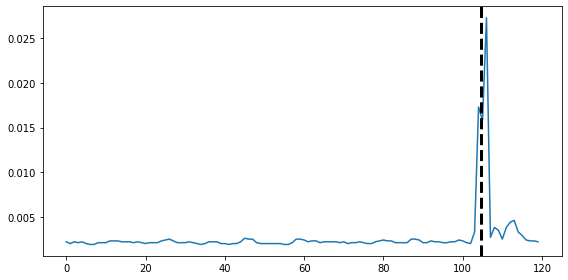

In [44]:
import ruptures as rpt

algo = rpt.Binseg(model='ar').fit(misdetected_series)
bkps = algo.predict(n_bkps=None, pen=0.0001)
rpt.show.display(misdetected_series, [], bkps, figsize=(8, 4))

/home/ubuntu/src/github.com/ai4sre/meltria-analyzer/.venv/lib/python3.9/site-packages/scipy/interpolate/fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


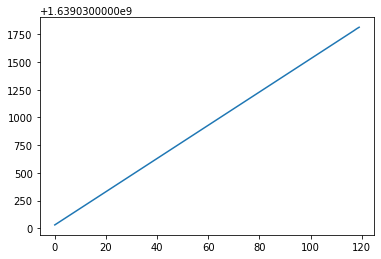

In [7]:
filepath = '/datasets/argowf-chaos-hg68n/2021-12-09-argowf-chaos-hg68n-user-db_pod-cpu-hog_0.json'
data_df, _, metrics_meta = tsdr.read_metrics_json(filepath)
liner_series = data_df['c-catalogue_last_seen'].to_numpy()
plt.plot(liner_series)

(<Figure size 576x288 with 1 Axes>, [<AxesSubplot:>])

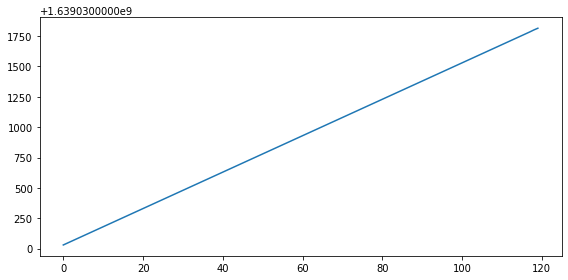

In [30]:
import ruptures as rpt

algo = rpt.Binseg(model='ar').fit(liner_series)
bkps = algo.predict(pen=10)
rpt.show.display(liner_series, [], bkps, figsize=(8, 4))

In [52]:
from statsmodels.stats.diagnostic import breaks_cusumolsresid, breaks_hansen

_, pvalue, _ = breaks_cusumolsresid(misdetected_series)
print(f"{pvalue:.10f}")

_, pvalue, _ = breaks_cusumolsresid(liner_series)
print(f"{pvalue:.10f}")


breaks_hansen(misdetected_series)

0.0000000000
0.0000000000
